In [1]:
from scipy.io.wavfile import read
from IPython.display import Audio, display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier as DTC
from numpy.testing import rundocs

import matplotlib.pyplot as plt
import numpy as np
import librosa
import os

/home/ghost/.local/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


# Load dataset

In [2]:
dataset = "dataset/splitted/"
num_labels = 10

In [3]:
labels = []
audios = []
for label in range(num_labels):
    label_path = f"{dataset}/{label}"
    for file in sorted(os.listdir(label_path)):
        file_path = label_path + "/" + file
        sample_rate, audio = read(file_path)
        labels.append(label)
        audios.append(audio)
labels = np.array(labels)

# Prepare features

In [4]:
max_duration_sec = 0.6
max_duration = int(max_duration_sec * sample_rate + 1e-6)

In [5]:
features = []
features_flatten = []
for audio in audios:
    if len(audio) < max_duration:
        audio = np.pad(audio, (0, max_duration - len(audio)), constant_values=0)
    feature = librosa.feature.melspectrogram(audio.astype(float), sample_rate, n_mels=80, fmax=4000)
    #print("ALERT! KEK KEK KEK!")
    #print(feature.shape)
    #features_flatten = feature.reshape(-1)
    #print(features_flatten.shape)
    features.append(feature)
    features_flatten.append(feature.reshape(-1))

print([feature.shape for feature in features])

[(80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57),

In [6]:
len(features_flatten)

879

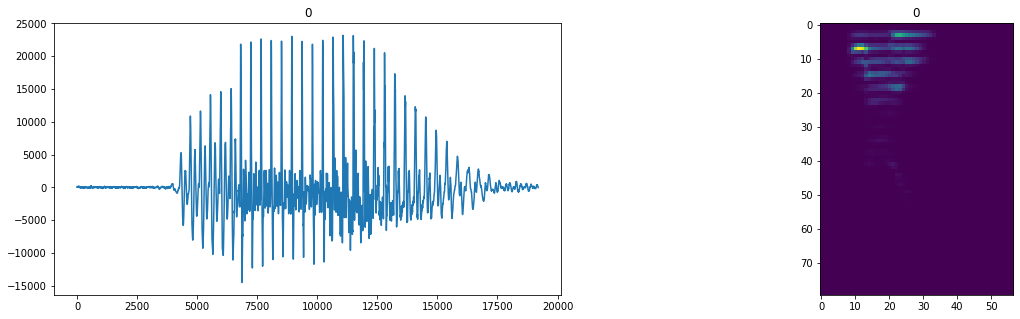

In [7]:
def plot(idx):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.title(f"{labels[idx]}")
    plt.plot(audios[idx])

    plt.subplot(1, 2, 2)
    plt.title(f"{labels[idx]}")
    plt.imshow(features[idx])

    display(Audio(audios[idx], rate=sample_rate))
plot(0)

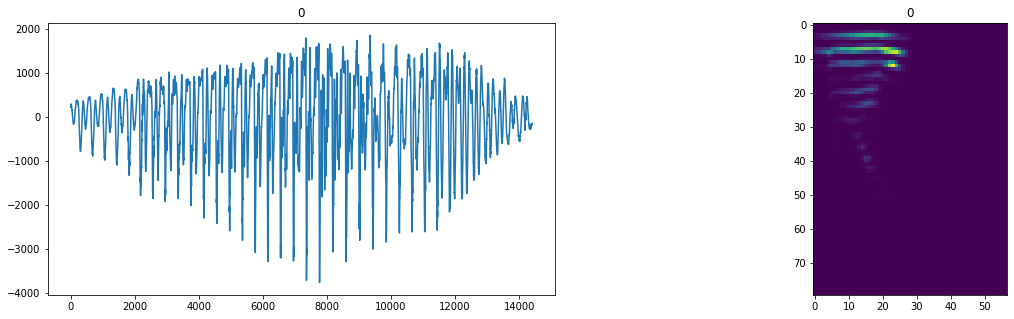

In [8]:
plot(2)

In [9]:
features_train, features_test, labels_train, labels_test = train_test_split(features_flatten, labels)

In [10]:
len(features_train), len(features_test), 

(659, 220)

In [11]:
labels_train

array([2, 4, 5, 6, 7, 5, 7, 3, 5, 7, 7, 1, 1, 6, 9, 2, 2, 1, 8, 9, 1, 5,
       8, 3, 8, 1, 3, 8, 5, 6, 5, 0, 8, 9, 8, 8, 1, 1, 8, 9, 4, 2, 0, 5,
       4, 5, 4, 4, 0, 2, 1, 7, 0, 7, 6, 8, 9, 9, 5, 9, 2, 1, 5, 7, 4, 5,
       2, 6, 9, 5, 1, 0, 4, 4, 6, 0, 2, 2, 9, 4, 9, 0, 9, 9, 9, 9, 6, 7,
       1, 3, 2, 1, 7, 3, 9, 3, 7, 6, 4, 5, 7, 2, 4, 5, 4, 7, 7, 3, 6, 2,
       4, 6, 3, 3, 6, 7, 0, 4, 2, 5, 3, 7, 1, 3, 1, 6, 6, 0, 9, 6, 8, 5,
       4, 8, 7, 2, 2, 6, 4, 2, 2, 6, 5, 0, 7, 8, 0, 6, 7, 2, 4, 7, 3, 7,
       3, 4, 7, 9, 2, 3, 2, 5, 1, 2, 4, 5, 5, 4, 9, 5, 4, 3, 4, 8, 4, 7,
       9, 1, 9, 0, 7, 6, 2, 1, 7, 6, 3, 1, 1, 0, 1, 5, 9, 2, 5, 0, 5, 8,
       7, 5, 6, 5, 0, 7, 4, 2, 4, 6, 5, 5, 1, 4, 3, 6, 3, 5, 3, 1, 0, 3,
       2, 6, 4, 0, 7, 3, 9, 1, 7, 2, 6, 3, 2, 3, 0, 1, 2, 1, 9, 0, 1, 2,
       9, 6, 3, 2, 1, 2, 7, 6, 1, 1, 2, 1, 3, 0, 2, 7, 6, 2, 7, 0, 2, 5,
       5, 4, 5, 6, 6, 9, 8, 2, 6, 6, 7, 9, 5, 3, 5, 4, 2, 9, 1, 4, 8, 2,
       0, 7, 2, 1, 2, 2, 6, 0, 0, 0, 6, 6, 7, 6, 7,

In [12]:
labels_test

array([8, 6, 1, 1, 0, 5, 2, 7, 0, 3, 3, 9, 9, 7, 3, 1, 6, 4, 0, 6, 5, 1,
       1, 5, 8, 1, 4, 8, 0, 3, 4, 5, 0, 5, 1, 0, 8, 1, 6, 0, 2, 7, 0, 9,
       4, 8, 6, 7, 6, 6, 6, 3, 9, 5, 3, 2, 1, 3, 6, 4, 1, 8, 4, 3, 5, 5,
       6, 5, 4, 2, 1, 5, 7, 7, 0, 4, 7, 7, 4, 0, 5, 8, 0, 1, 7, 4, 7, 6,
       4, 3, 3, 8, 4, 8, 2, 6, 9, 9, 0, 7, 7, 2, 3, 2, 2, 3, 0, 6, 2, 6,
       0, 0, 9, 8, 2, 2, 6, 3, 5, 3, 9, 2, 6, 7, 3, 5, 7, 2, 6, 0, 6, 6,
       0, 2, 2, 1, 9, 2, 3, 2, 4, 5, 7, 3, 2, 3, 0, 2, 1, 7, 8, 3, 9, 1,
       9, 8, 7, 6, 6, 6, 4, 3, 7, 6, 3, 0, 5, 2, 1, 6, 9, 3, 5, 9, 3, 2,
       3, 2, 1, 7, 4, 3, 9, 5, 1, 8, 9, 7, 1, 4, 9, 4, 6, 5, 1, 4, 4, 4,
       5, 2, 0, 5, 7, 0, 2, 5, 0, 5, 5, 0, 5, 9, 7, 3, 8, 3, 5, 3, 3, 0])

# Train model

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html


In [13]:
# model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
model = MLPClassifier(hidden_layer_sizes=(400, 200, 100, 50))

In [14]:
model.fit(X=features_train, y=labels_train)

/home/ghost/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(400, 200, 100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

# Save model

In [15]:
import pickle
filename = "model.pkl"
model_pickled = pickle.dumps(model)
with open(filename, 'wb') as f:
    f.write(model_pickled)

# Load model


In [16]:
import pickle
filename = "model.pkl"
with open(filename, 'rb') as f:
    model_pickled = f.read()
model = pickle.loads(model_pickled)

# Validate model

In [17]:
labels_test_predicted = model.predict(X=features_test)

In [18]:
labels_test_predicted

array([0, 6, 1, 1, 0, 5, 8, 1, 0, 3, 7, 9, 6, 7, 3, 1, 6, 4, 0, 6, 2, 9,
       1, 0, 8, 1, 7, 7, 0, 3, 4, 5, 0, 2, 1, 0, 8, 1, 5, 7, 2, 6, 2, 3,
       4, 8, 6, 7, 6, 5, 6, 3, 6, 5, 1, 2, 9, 3, 6, 9, 8, 8, 4, 4, 6, 5,
       5, 5, 4, 2, 3, 2, 7, 8, 0, 4, 7, 0, 4, 0, 5, 8, 0, 1, 1, 4, 7, 6,
       1, 3, 6, 5, 4, 8, 0, 6, 9, 9, 0, 7, 7, 2, 3, 2, 2, 3, 8, 7, 2, 7,
       0, 0, 9, 0, 2, 0, 6, 3, 5, 9, 9, 2, 6, 7, 3, 5, 6, 2, 6, 0, 6, 5,
       0, 2, 2, 9, 4, 2, 3, 2, 4, 5, 7, 3, 2, 7, 0, 2, 1, 7, 8, 3, 3, 4,
       9, 8, 7, 6, 6, 4, 7, 3, 7, 6, 3, 2, 5, 2, 7, 6, 9, 7, 5, 9, 3, 2,
       3, 2, 1, 6, 4, 3, 9, 5, 3, 8, 3, 7, 1, 4, 9, 4, 4, 5, 1, 4, 4, 9,
       6, 2, 0, 5, 7, 0, 0, 5, 0, 2, 2, 0, 5, 9, 7, 3, 8, 3, 5, 3, 3, 0])

In [19]:
labels_test

array([8, 6, 1, 1, 0, 5, 2, 7, 0, 3, 3, 9, 9, 7, 3, 1, 6, 4, 0, 6, 5, 1,
       1, 5, 8, 1, 4, 8, 0, 3, 4, 5, 0, 5, 1, 0, 8, 1, 6, 0, 2, 7, 0, 9,
       4, 8, 6, 7, 6, 6, 6, 3, 9, 5, 3, 2, 1, 3, 6, 4, 1, 8, 4, 3, 5, 5,
       6, 5, 4, 2, 1, 5, 7, 7, 0, 4, 7, 7, 4, 0, 5, 8, 0, 1, 7, 4, 7, 6,
       4, 3, 3, 8, 4, 8, 2, 6, 9, 9, 0, 7, 7, 2, 3, 2, 2, 3, 0, 6, 2, 6,
       0, 0, 9, 8, 2, 2, 6, 3, 5, 3, 9, 2, 6, 7, 3, 5, 7, 2, 6, 0, 6, 6,
       0, 2, 2, 1, 9, 2, 3, 2, 4, 5, 7, 3, 2, 3, 0, 2, 1, 7, 8, 3, 9, 1,
       9, 8, 7, 6, 6, 6, 4, 3, 7, 6, 3, 0, 5, 2, 1, 6, 9, 3, 5, 9, 3, 2,
       3, 2, 1, 7, 4, 3, 9, 5, 1, 8, 9, 7, 1, 4, 9, 4, 6, 5, 1, 4, 4, 4,
       5, 2, 0, 5, 7, 0, 2, 5, 0, 5, 5, 0, 5, 9, 7, 3, 8, 3, 5, 3, 3, 0])

In [20]:
(labels_test_predicted == labels_test).mean()

0.7227272727272728

In [21]:
labels_test_predicted

array([0, 6, 1, 1, 0, 5, 8, 1, 0, 3, 7, 9, 6, 7, 3, 1, 6, 4, 0, 6, 2, 9,
       1, 0, 8, 1, 7, 7, 0, 3, 4, 5, 0, 2, 1, 0, 8, 1, 5, 7, 2, 6, 2, 3,
       4, 8, 6, 7, 6, 5, 6, 3, 6, 5, 1, 2, 9, 3, 6, 9, 8, 8, 4, 4, 6, 5,
       5, 5, 4, 2, 3, 2, 7, 8, 0, 4, 7, 0, 4, 0, 5, 8, 0, 1, 1, 4, 7, 6,
       1, 3, 6, 5, 4, 8, 0, 6, 9, 9, 0, 7, 7, 2, 3, 2, 2, 3, 8, 7, 2, 7,
       0, 0, 9, 0, 2, 0, 6, 3, 5, 9, 9, 2, 6, 7, 3, 5, 6, 2, 6, 0, 6, 5,
       0, 2, 2, 9, 4, 2, 3, 2, 4, 5, 7, 3, 2, 7, 0, 2, 1, 7, 8, 3, 3, 4,
       9, 8, 7, 6, 6, 4, 7, 3, 7, 6, 3, 2, 5, 2, 7, 6, 9, 7, 5, 9, 3, 2,
       3, 2, 1, 6, 4, 3, 9, 5, 3, 8, 3, 7, 1, 4, 9, 4, 4, 5, 1, 4, 4, 9,
       6, 2, 0, 5, 7, 0, 0, 5, 0, 2, 2, 0, 5, 9, 7, 3, 8, 3, 5, 3, 3, 0])

load model

In [22]:
import pickle
filename = "model.pkl"
with open(filename, 'rb') as f:
    model_pickled = f.read()
model = pickle.loads(model_pickled)

In [23]:
for digit in range(10):
    mask = labels_test == digit
    accuracy = (labels_test_predicted[mask] == labels_test[mask]).mean()
    print(f"{digit}: {accuracy:.3f}")

0: 0.833
1: 0.600
2: 0.833
3: 0.759
4: 0.750
5: 0.680
6: 0.680
7: 0.682
8: 0.714
9: 0.647


load file

In [24]:
file_path = "dataset/inference/unk.wav"
sample_rate, audio = read(file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/inference/unk.wav'

prepare feature

In [ ]:
max_duration_sec = 0.6
max_duration = int(max_duration_sec * sample_rate + 1e-6)
if len(audio) < max_duration:
    audio = np.pad(audio, (0, max_duration - len(audio)), constant_values=0)
feature = librosa.feature.melspectrogram(audio.astype(float), sample_rate, n_mels=16, fmax=1000)
features_flatten = feature.reshape(-1)

prediction

In [ ]:
answer = model.predict([features_flatten])[0]
answer